In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [32]:
# confirmed_data_df = confirmed_df[confirmed_df.columns[4:]]
confirmed_data_df = confirmed_df.iloc[:, 4:]
print(confirmed_data_df.shape)
deaths_data_df = deaths_df.iloc[:, 4:]
print(deaths_data_df.shape)
recovered_data_df = recovered_df.iloc[:, 4:]
print(recovered_data_df.shape)

(266, 217)
(266, 217)
(253, 217)


In [ ]:
countries = ['US', 'Vietnam']

**Warning: cannot use these row indices for recovery cases (not all countries report recoveries)**

In [29]:
ci = {cname: confirmed_df.index[confirmed_df['Country/Region']==cname][0] for cname in countries}
print(ci)

{'US': 242, 'Vietnam': 260}


In [33]:
us_confirmed = confirmed_data_df.loc[ci['US']]
print(us_confirmed)

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
8/21/20    5622540
8/22/20    5667112
8/23/20    5701679
8/24/20    5739724
8/25/20    5777710
Name: 242, Length: 217, dtype: int64


In [34]:
vn_confirmed = confirmed_data_df.loc[ci['Vietnam']]

In [ ]:
days_count = confirmed_data_df.shape[1]
print(days_count)

In [70]:
today_idx = confirmed_data_df.columns.get_loc('7/1/20')
print(today_idx)

161


In [52]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
clf1 = make_pipeline(PolynomialFeatures(2), Ridge())
# clf1 = Ridge()

In [53]:
clf1 = Pipeline([("polynomial_features", PolynomialFeatures(degree=3,
                                             include_bias=False)),
                 ("linear_regression", LinearRegression())])

In [71]:
# clf1.fit(X=us_confirmed[:today_idx], y=list(range(today_idx)))
# clf1.fit(X=range(today_idx), y=us_confirmed[:today_idx].to_numpy().reshape(-1, 1))
clf1.fit(X=np.arange(today_idx).reshape(-1, 1), y=us_confirmed[:today_idx])
prediction1 = clf1.predict(X=np.arange(today_idx, days_count).reshape(-1, 1))

In [65]:
print(prediction1)

[4353692.91067891 4406025.82487266 4458695.25844086 4511701.67872406
 4565045.55306283 4618727.34879774 4672747.53326935 4727106.57381822
 4781804.93778492 4836843.09251002 4892221.50533407 4947940.64359765
 5004000.97464131 5060402.96580562 5117147.08443115 5174233.79785845
 5231663.5734281  5289436.87848066 5347554.18035669 5406015.94639676
 5464822.64394143 5523974.74033126 5583472.70290683 5643316.99900869
 5703508.0959774 ]


<Figure size 1080x720 with 0 Axes>

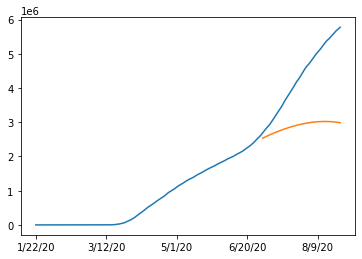

<Figure size 1080x720 with 0 Axes>

In [72]:
us_confirmed.plot()
plt.plot(range(today_idx, days_count), prediction1)
plt.figure(figsize=(15, 10))